# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

    
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Josh Bond\Anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
housing_units_mean = sfo_data.groupby('year')[['housing_units']].mean()

min = sfo_data['housing_units'].min()
max = sfo_data['housing_units'].max()
std = sfo_data['housing_units'].std()

In [5]:
housing_units_mean

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

In [6]:
# Save the dataframe as a csv file
# YOUR CODE HERE!
housing_units_mean.to_csv('housing_units.csv')

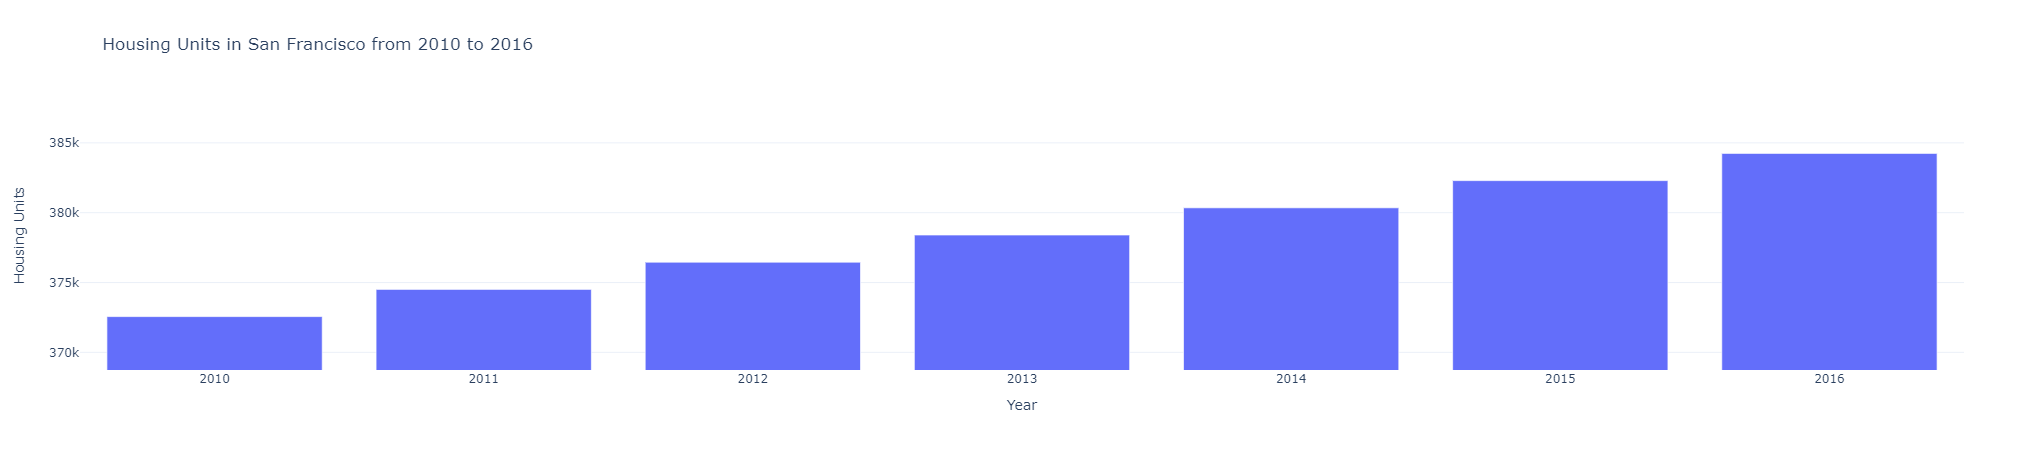

In [7]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!
figx = px.bar(
    housing_units_mean,
    y='housing_units',
    title='Housing Units in San Francisco from 2010 to 2016',
    labels={
        'housing_units':'Housing Units','year':'Year'
    },
    range_y=((min-std),(max+std)),
    template='plotly_white',
    width=900
)
figx
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

In [8]:
# #Alternative way to plot #1
# fig1 = housing_units_mean.plot(
#     title='Housing Units in San Francisco from 2010 to 2016',
#     kind='bar',
#     legend=False
# )
# fig1.set_xlabel('Year')
# fig1.set_ylabel('Housing Units')
# fig1.set_ylim((min-std),(max+std))


In [9]:
# #Alternative way to plot #2
# plot_housing_avgs = housing_units_mean.hvplot.bar(
#     label='Housing Units in San Francisco from 2010 to 2016',
#     xlabel='Year',
#     ylabel='Housing Units',
#     rot=90
# ).opts(yformatter="%.0f",ylim=((min-std),(max+std)),yticks=8)
# plot_housing_avgs


- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [10]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!
avg_gross_rent = sfo_data['gross_rent'].groupby('year').mean()
avg_sales_price = sfo_data['sale_price_sqr_foot'].groupby('year').mean()
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

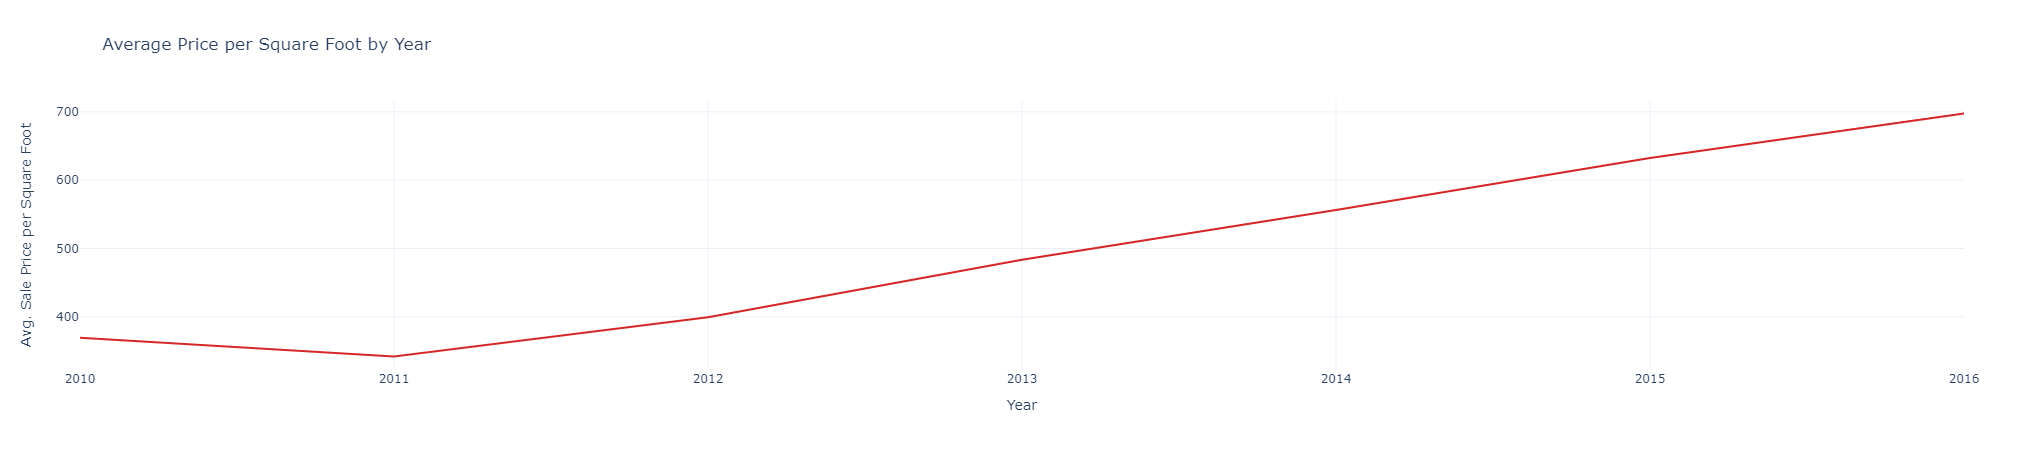

In [11]:
# Line chart for average sale price per square foot
# YOUR CODE HERE!
figy = px.line(
    avg_sales_price,
    y='sale_price_sqr_foot',
    title='Average Price per Square Foot by Year',
    labels={
        'sale_price_sqr_foot':'Avg. Sale Price per Square Foot','year':'Year'
    },
    template= 'plotly_white',
    width=900
)
figy['data'][0]['line']['color']='rgb(214, 39, 40)'
figy


In [12]:
# # #Alternate way to plot #1
# fig2 = avg_sales_price.plot(
#     title='Average Price per Square Foot by Year',
#     color='red'
# )
# fig2.set_xlabel('Year')
# fig2.set_ylabel('Avg. Sale Price per Square Foot')
# fig2

In [13]:
# #Alternate way to plot #2
# avg_sales_price_plot = avg_sales_price.hvplot(
#     label='Average Price per Square Foot by Year',
#     rot=90
# ).opts(
#     xlabel='Year', 
#     ylabel='Price per Square Foot',
#     yticks=7,
#     line_color='red')

# avg_sales_price_plot

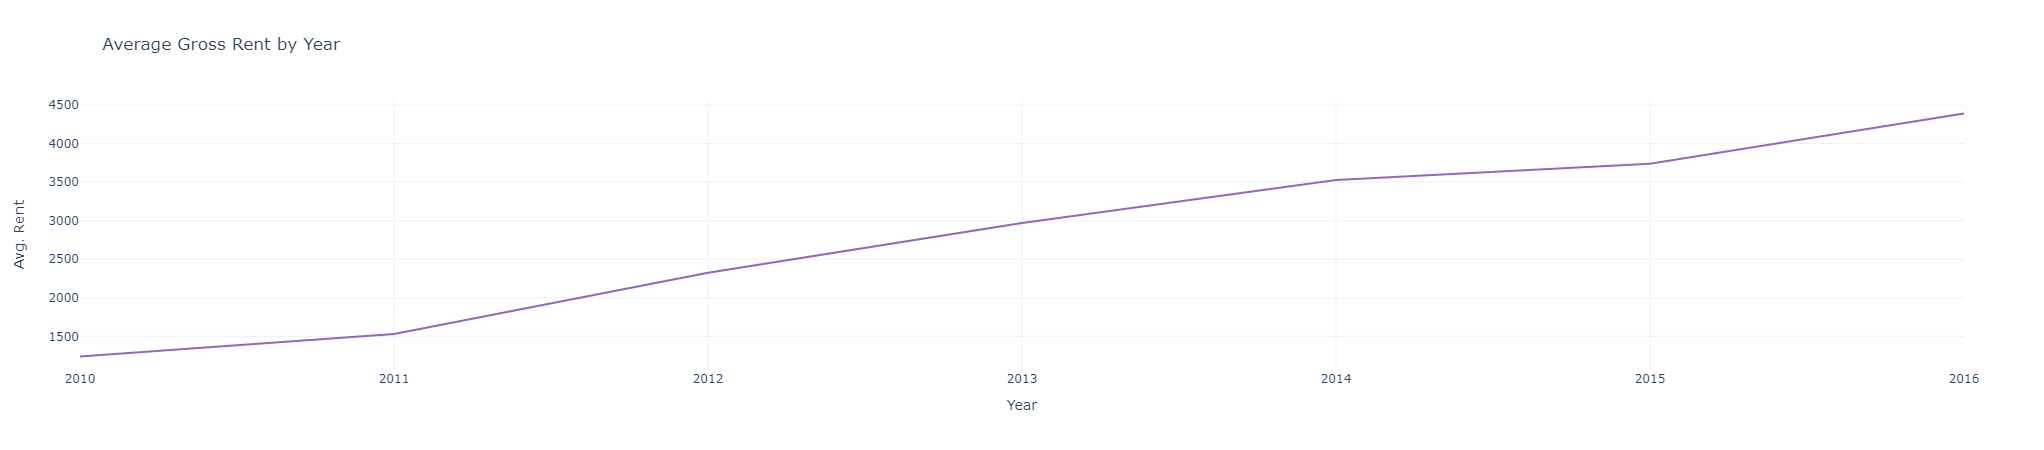

In [14]:
# Line chart for average montly rent
# YOUR CODE HERE!
figz = px.line(
    avg_gross_rent,
    y='gross_rent',
    title='Average Gross Rent by Year',
    labels={
        'gross_rent':'Avg. Rent','year':'Year'
    },
    template= 'plotly_white',
    width=900
)
figz['data'][0]['line']['color']='rgb(148, 103, 189)'
figz


In [15]:
# #Alternate way to plot #1
# fig3 = avg_gross_rent.plot(
#     title='Average Gross Rent by Year',
#     color='purple'
# )
# fig3.set_xlabel('Year')
# fig3.set_ylabel('Average Rent')
# fig3

In [16]:
# #Alternate way to plot #2
# avg_gross_rent_plot = avg_gross_rent.hvplot(
#     label='Average Gross Rent by Year',
#     rot=90
# ).opts(
#     xlabel='Year',
#     ylabel='Avg. Rent',
#     line_color='purple')

# avg_gross_rent_plot

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [17]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
neighborhood_df = pd.DataFrame(
    sfo_data
    .groupby(['year','neighborhood'])
    .mean()
    .reset_index()
)
neighborhood_df.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239

In [18]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
avg_price_by_neighborhood = neighborhood_df.hvplot(
    x='year',
    y='sale_price_sqr_foot',
    groupby='neighborhood', 
    widget_location='right',
    ylabel='Avg. Sale Price per Square Foot', 
    xlabel='Year',
    height=450
)
avg_price_by_neighborhood

Row
    [0] HoloViews(DynamicMap, widget_location='right')
    [1] Column
        [0] VSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [2] VSpacer()

In [19]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
avg_rent_by_neighborhood = neighborhood_df.hvplot(
    x='year',
    y='gross_rent',
    groupby='neighborhood',
    widget_location='right',
    ylabel='Avg. Rent',
    xlabel='Year',
    height=450
)
avg_rent_by_neighborhood

Row
    [0] HoloViews(DynamicMap, widget_location='right')
    [1] Column
        [0] VSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [2] VSpacer()

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [20]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!
top10 = pd.DataFrame(
    sfo_data
    .groupby('neighborhood')
    .mean()
    .sort_values('sale_price_sqr_foot',ascending=False)
    .reset_index()
)
top10 = top10.loc[
    (top10.index < 10)
]
top10

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

In [21]:
top10index = top10.set_index('neighborhood')
top10_yearly = sfo_data[sfo_data['neighborhood'].isin(top10index.index)]
top10_yearly.reset_index(inplace=True)
top10_yearly.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010        Cow Hollow           569.379968         372560        1239
1  2010     Miraloma Park           680.608729         372560        1239
2  2010   Pacific Heights           496.516014         372560        1239
3  2010      Potrero Hill           491.450004         372560        1239
4  2010  Presidio Heights           549.417931         372560        1239

In [22]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
top10_plot = top10.hvplot.bar(
    title='Top 10 Expensive Neighborhoods in San Francisco',
    x='neighborhood',
    y='sale_price_sqr_foot',
    rot=90,
    height=450,
    ylabel="Avg. Sale Price per Square Foot",
    xlabel='Neighborhood'
)
top10_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [23]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!
neighborhood_df.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [36]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
rent_sales_plot = top10_yearly.hvplot(
    kind='bar',
    y=['sale_price_sqr_foot','gross_rent'],
    x='year',
    groupby='neighborhood',
    rot=90,
    xlabel='Year',
    ylabel='Avg. Rent/Sale Price per Sqft',
    height=450
)
rent_sales_plot

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [25]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!
neighborhood_coords = pd.read_csv(Path("Data/neighborhoods_coordinates.csv"))
neighborhood_coords = neighborhood_coords.set_index('Neighborhood')
neighborhood_coords.head()

Lat         Lon
Neighborhood                          
Alamo Square     37.791012 -122.402100
Anza Vista       37.779598 -122.443451
Bayview          37.734670 -122.401060
Bayview Heights  37.728740 -122.410980
Bernal Heights   37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [26]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
neighborhood_mean = sfo_data.groupby('neighborhood').mean().reset_index()
neighborhood_mean = neighborhood_mean.set_index('neighborhood')
neighborhood_mean.head()

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                    
Alamo Square              366.020712       378401.0  2817.285714
Anza Vista                373.382198       379050.0  3031.833333
Bayview                   204.588623       376454.0  2318.400000
Bayview Heights           590.792839       382295.0  3739.000000
Bernal Heights            576.746488       379374.5  3080.333333

In [27]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
location_means_df = (
    pd.concat([neighborhood_coords,neighborhood_mean],axis=1,sort=True)
    .dropna()
    .reset_index()
)
location_means_df.head()

index        Lat         Lon  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100           366.020712   
1        Anza Vista  37.779598 -122.443451           373.382198   
2           Bayview  37.734670 -122.401060           204.588623   
3   Bayview Heights  37.728740 -122.410980           590.792839   
4  Buena Vista Park  37.768160 -122.439330           452.680591   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
4       378076.5  2698.833333

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

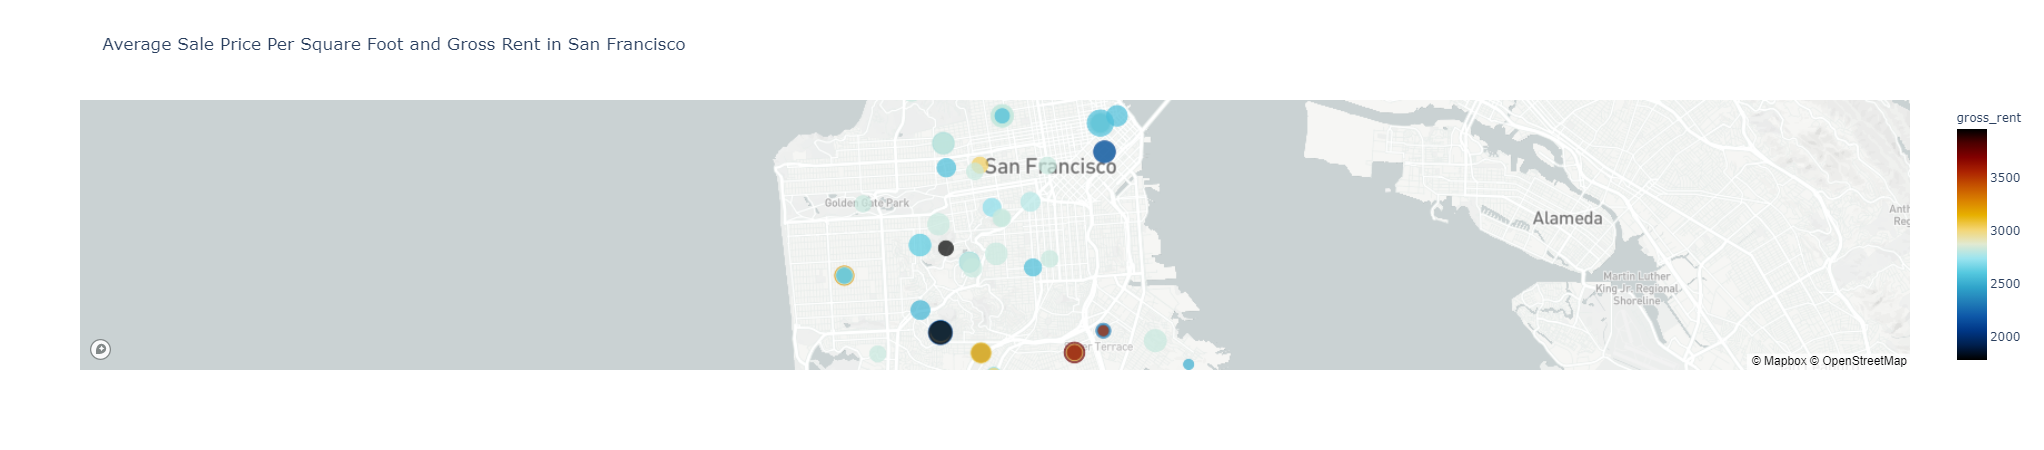

In [28]:
# Set the mapbox access token
# YOUR CODE HERE!
px.set_mapbox_access_token(map_box_api)
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
neighborhood_scatter_plot = px.scatter_mapbox(
    location_means_df,
    lat='Lat',
    lon='Lon',
    color='gross_rent',
    size='sale_price_sqr_foot',
    title='Average Sale Price Per Square Foot and Gross Rent in San Francisco',
    zoom=11,
    color_continuous_scale=px.colors.cyclical.IceFire,
    width=900,
    height=450
)
neighborhood_scatter_plot

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [29]:
# Fetch the data from all expensive neighborhoods per year.
top10.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


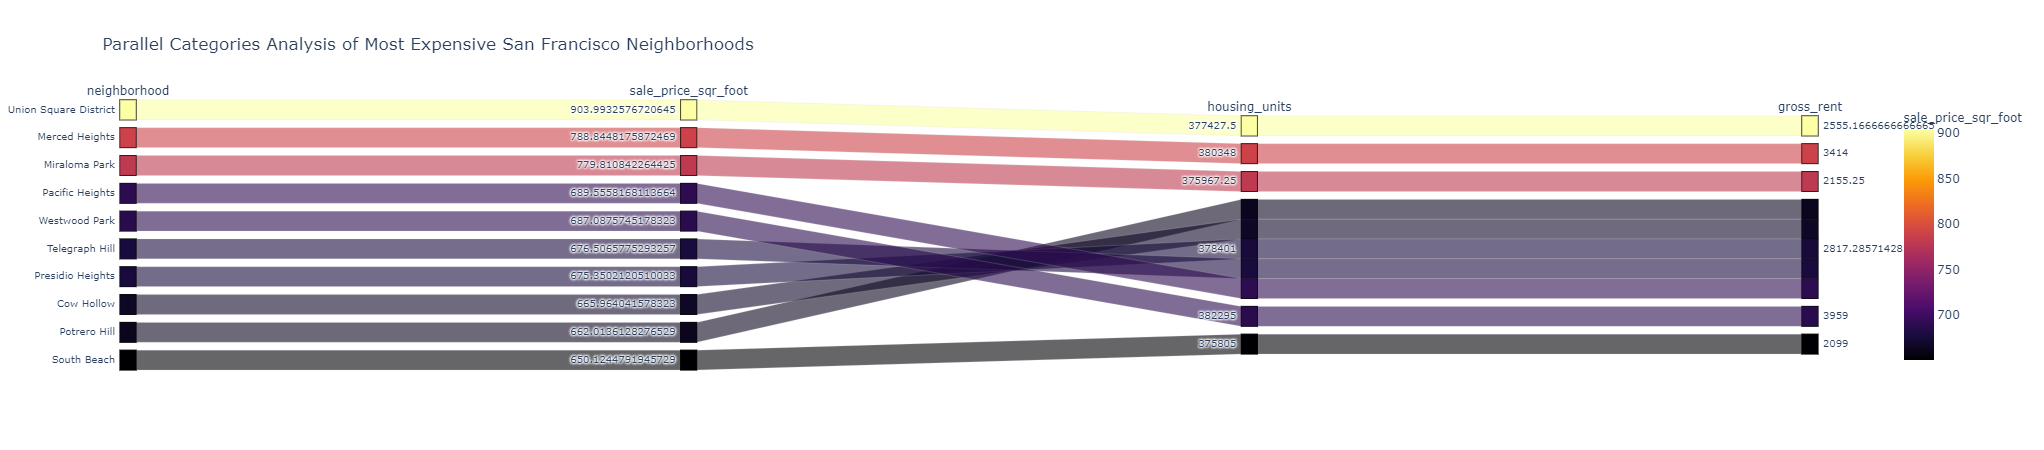

In [30]:
# Parallel Categories Plot
# YOUR CODE HERE!
parallel_categories = px.parallel_categories(
    top10,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units","gross_rent"],
    title='Parallel Categories Analysis of Most Expensive San Francisco Neighborhoods',
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    width=900
)
parallel_categories

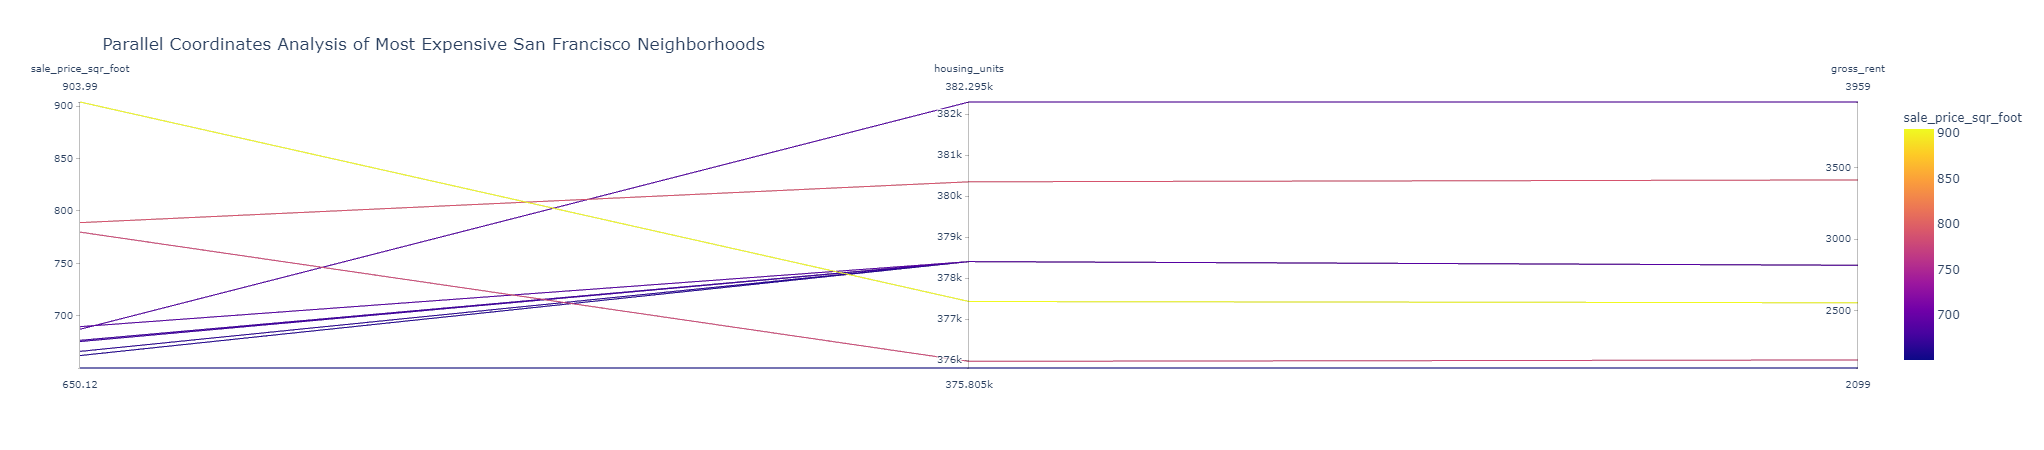

In [31]:
# Parallel Coordinates Plot
# YOUR CODE HERE!
parallel_coordinates = px.parallel_coordinates(
    top10,
    title='Parallel Coordinates Analysis of Most Expensive San Francisco Neighborhoods', 
    color="sale_price_sqr_foot",
    width=900
)
parallel_coordinates

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

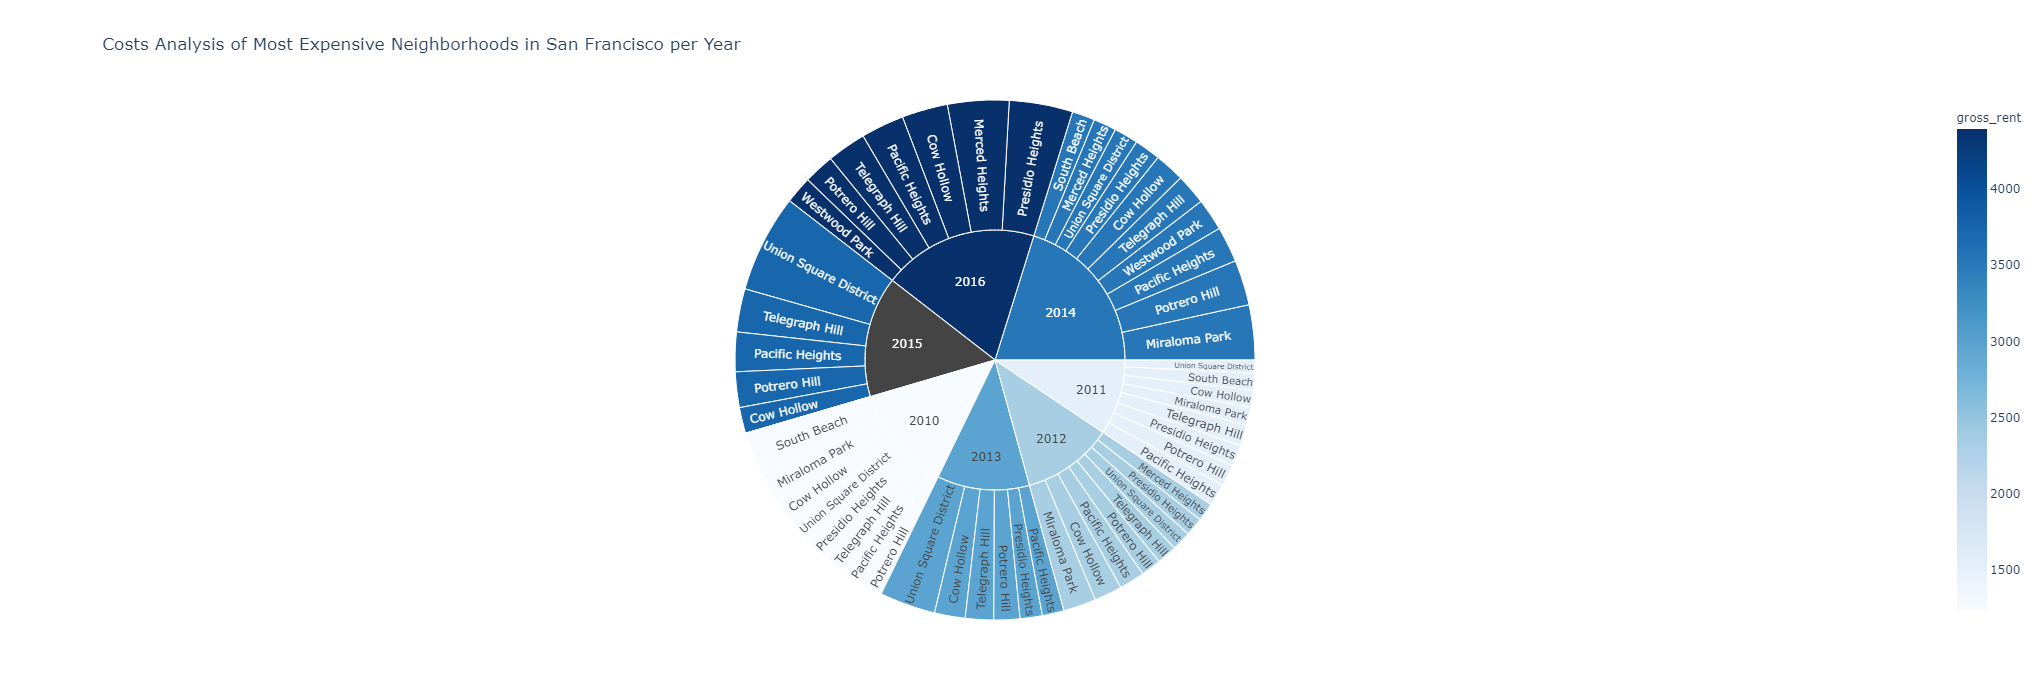

In [32]:
# Sunburst Plot
# YOUR CODE HERE!
sunburst_fig = px.sunburst(
    top10_yearly,
    path=['year','neighborhood'],
    title='Costs Analysis of Most Expensive Neighborhoods in San Francisco per Year', 
    values='sale_price_sqr_foot',
    color='gross_rent',
    color_continuous_scale=px.colors.sequential.Blues,
    height=700,
    width=900
)
sunburst_fig